In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Create DataFrames for the labels
train_labels_df = pd.DataFrame(y_train, columns=["Label"])
test_labels_df = pd.DataFrame(y_test, columns=["Label"])

# Label descriptions (CIFAR-10 classes)
label_names = {
    0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat",
    4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse",
    8: "Ship", 9: "Truck"
}

# Add descriptive labels to the DataFrame
train_labels_df["Label_Description"] = train_labels_df["Label"].map(label_names)
test_labels_df["Label_Description"] = test_labels_df["Label"].map(label_names)

# Calculate class distributions
train_distribution = train_labels_df["Label_Description"].value_counts()
test_distribution = test_labels_df["Label_Description"].value_counts()

# Display image dimensions and dataset sizes
train_shape = x_train.shape
test_shape = x_test.shape

# Summarize dataset information
summary = {
    "Dataset": ["Training", "Testing"],
    "Number of Samples": [train_shape[0], test_shape[0]],
    "Image Dimensions": [f"{train_shape[1]}x{train_shape[2]}x{train_shape[3]}",
                          f"{test_shape[1]}x{test_shape[2]}x{test_shape[3]}"]
}

summary_df = pd.DataFrame(summary)

# Display results
print("CIFAR-10 Dataset Summary:")
print(summary_df)
print("\nTraining Data Label Distribution:")
print(train_distribution)
print("\nTesting Data Label Distribution:")
print(test_distribution)


CIFAR-10 Dataset Summary:
    Dataset  Number of Samples Image Dimensions
0  Training              50000          32x32x3
1   Testing              10000          32x32x3

Training Data Label Distribution:
Label_Description
Frog          5000
Truck         5000
Deer          5000
Automobile    5000
Bird          5000
Horse         5000
Ship          5000
Cat           5000
Dog           5000
Airplane      5000
Name: count, dtype: int64

Testing Data Label Distribution:
Label_Description
Cat           1000
Ship          1000
Airplane      1000
Frog          1000
Automobile    1000
Truck         1000
Dog           1000
Horse         1000
Deer          1000
Bird          1000
Name: count, dtype: int64


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
label_names

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

In [7]:
import matplotlib.pyplot as plt
# Visualize a few training images
def plot_sample_images(images, labels, label_names, num_rows=2, num_cols=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(label_names[int(labels[i])])
        plt.axis('off')
    plt.show()


\nSample Images:


<ipython-input-7-f616e1f3ea2f>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(label_names[int(labels[i])])


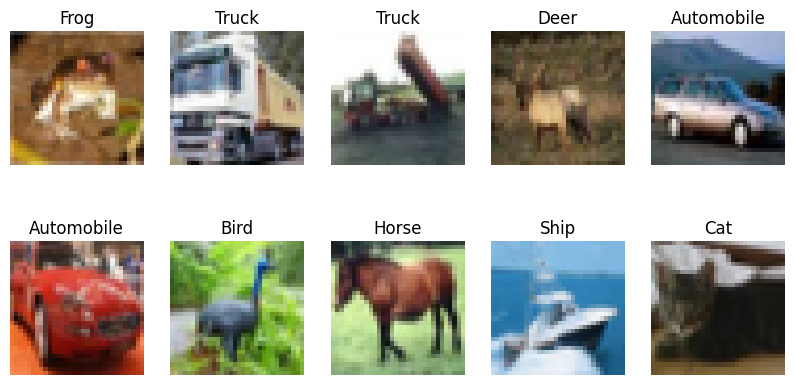

In [8]:
print("\\nSample Images:")
plot_sample_images(x_train, y_train, label_names)

In [9]:
def plot_class_distribution(labels, label_names):
    unique, counts = np.unique(labels, return_counts=True)

    # Convert label_names dictionary to a list of its values
    label_names_list = list(label_names.values())

    plt.figure(figsize=(8, 4))
    # Use range(len(label_names_list)) for x-axis positions
    plt.bar(range(len(label_names_list)), counts, color='skyblue', tick_label=label_names_list)
    plt.title("Class Distribution in CIFAR-10 Dataset")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

\nClass Distribution:


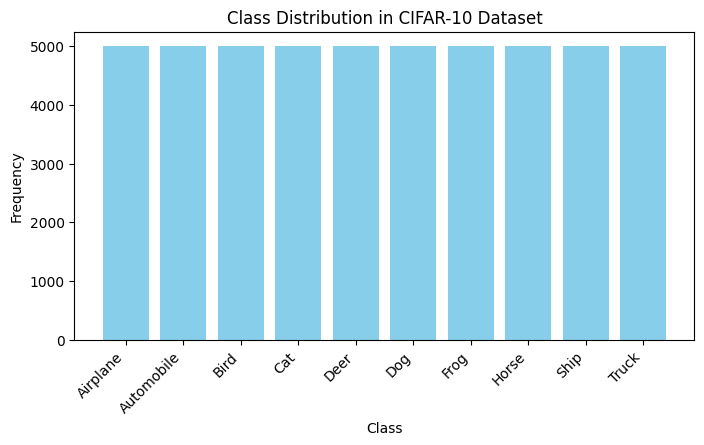

In [10]:
print("\\nClass Distribution:")
plot_class_distribution(y_train,label_names)

## Model Training

In [11]:
# Install necessary packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:

# Define a function to create a model
def create_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='softmax'))
    return model


In [14]:
resnet_model= create_model(tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
))

In [ ]:
# Train models
def train_model(model, preprocess_func, train_data, train_labels, test_data, test_labels):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # Preprocess images
    train_data_preprocessed = preprocess_func(train_data)
    test_data_preprocessed = preprocess_func(test_data)

    # Train the model
    model.fit(train_data_preprocessed, train_labels, epochs=5, validation_data=(test_data_preprocessed, test_labels))


train_model(resnet_model, tf.keras.applications.resnet50.preprocess_input, train_images, train_labels, test_images, test_labels)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/5
 234/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.1312 - loss: 2.7218

In [ ]:
# Evaluate models
def evaluate_model(model, preprocess_func, test_data, test_labels):
    test_data_preprocessed = preprocess_func(test_data)
    predictions = model.predict(test_data_preprocessed)
    y_pred = np.argmax(predictions, axis=1)

    acc = accuracy_score(test_labels, y_pred)
    print(f'\nAccuracy: {acc:.4f}')

    print('\nClassification Report:')
    print(classification_report(test_labels, y_pred))

    print('\nConfusion Matrix:')
    print(confusion_matrix(test_labels, y_pred))

print('\nResNet Model Evaluation:')
evaluate_model(resnet_model, tf.keras.applications.resnet50.preprocess_input, test_images, test_labels)


In [ ]:
# Step 7: Evaluate the Model
test_loss, test_accuracy = resnet_model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
def load_and_preprocess_image(image_path, input_size=(32, 32)):
    """
    Load an image, resize it, and preprocess for prediction.
    """
    # Load and resize the image
    image = load_img(image_path, target_size=input_size)  # Resizing for the model
    image = img_to_array(image)  # Convert to numpy array
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Preprocess the image (adjust this based on the model)
    image = image / 255.0  # CIFAR-10 normalization
    return image

# Step 2: Make predictions
def predict_image(model, image, class_names):
    """
    Predict the class of the input image and return the result.
    """
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)
    return class_names[predicted_class], confidence

# CIFAR-10 class names
cifar10_classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Path to the image (replace 'uploaded_image.jpg' with your file path)
image_path = '/content/R.jpg' # Update with your uploaded image file path

# Preprocess the image
input_image = load_and_preprocess_image(image_path, input_size=(32, 32))

# Step 3: Predict using the model
predicted_label, confidence = predict_image(resnet_model, input_image, cifar10_classes)

# Step 4: Display the image and prediction
plt.imshow(np.squeeze(input_image))  # Remove batch dimension for display
plt.title(f"Predicted: {predicted_label} ({confidence:.2f})")
plt.axis('off')
plt.show()
